# Neural Networks Summer 2019

This notebook seeks to summarize and document the content learned during the Summer 2019 S-STEM summer reasearch program.

| Week 1 | [Week 2](#week2) | [Week 3](#week3) |
|---| --- | --- |
| [Linear Algebra](#linear-algebra) | [Multilayer Nets](#multilayer-networks)|
| [PCA](#PCA) | [Reinforcement Learning](#reinforcement)|
| [Single Layer Neural Nets](#single-layer-neural-networks) | |

---

## Week 1
During the first week, we covered introductory topics needed to get started in the area of neural networks. We began by learning to use Jupyter notebooks, followed by an intro to LaTeX and Markdown. These tools will be used throughout the program to help document our code and processes.

In addition we covered some python libraries that will be useful, such as Matplotlib and numpy. Towards the end of the week, we began learning about the basics of neural networks, starting with tools like Keras and TensorFlow. We used these to practice with a single layer neural network and started learning about multilayer networks.

<a name="linear-algebra"></a>
#### Linear Algebra
##### Distance and Similarity
When speaking in terms of neural networks, it's often useful to describe something as similar or disimilar to a class of things. For this, it is helpful to have some mathmatical methods of difining this similarity or difference. A common distance metric is the **Euclidean distance**: $\sqrt{\sum_{i=1}^{n}{(\boldsymbol{x}_i - \boldsymbol{y}_i)^2}}$ . Let's take a peak at that using numpy. Notice how easy numpy arrays make it.

In [11]:
import numpy as np

X = np.array([5.0, 10.0])
Y = np.array([1.0, 8.0])

np.sqrt(np.sum(pow(X-Y, 2.0)))

4.47213595499958

In [10]:
# This can also be done using scipy's euclidean method
import scipy.spatial.distance as ssd

ssd.euclidean(X, Y)

4.47213595499958

A common metric used for similarity is the **cosine similarity** function: $\cos {\theta} = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}
                      {\lVert \boldsymbol{x} \rVert_2 
                       \lVert \boldsymbol{y} \rVert_2}$
We can calculate that as well using numpy:

In [9]:
# Calculate the cosine similarity
np.sum(X*Y) / (np.sqrt(np.dot(X,X)) * np.sqrt(np.dot(Y,Y)))

0.9429903335828895

There is also a **cosine dissimilarity** function derived from the similarity function. It looks like so: $\cos {\theta} = 1 - \frac{\boldsymbol{x} \cdot \boldsymbol{y}}
                      {\lVert \boldsymbol{x} \rVert_2 
                       \lVert \boldsymbol{y} \rVert_2}$
This can be calculated by using numpy, or easily with the scipy method:

In [12]:
ssd.cosine(X, Y)

0.05700966641711047

##### Matrices
It is also important to become familiar with matrix operations, as they are an integral piece of neural networks. Luckily, numpy also makes this quite easy.

In [28]:
# For displaying matrices
from sympy import *
init_printing(use_latex=True)

X = np.array([5.0, 10.0])
Y = np.array([1.0, 8.0])
Z = np.array([2.0, 4.5])
# Create the matrix
data = np.array([X, Y, Z])
Matrix(data)

⎡5.0  10.0⎤
⎢         ⎥
⎢1.0  8.0 ⎥
⎢         ⎥
⎣2.0  4.5 ⎦

An important concept with matrices is **pairwise distance**. This involves calculating the distance between each of the vectors in a given matrices. Let's take a look at how this is done using `pdist()`:

In [29]:
ssd.squareform(ssd.pdist(data, metric='euclidean'))

array([[0.        , 4.47213595, 6.26498204],
       [4.47213595, 0.        , 3.64005494],
       [6.26498204, 3.64005494, 0.        ]])

Yet another important skill with matrices is decomposition, where $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{\Sigma} \boldsymbol{V}^\intercal$. Numpy makes this easy as well. Using `np.linalg.svd()` we will decompose a matrix into singular, left-singular, and right-singular values.

In [39]:
U, S, V = np.linalg.svd(data, full_matrices=True)
Mul(Matrix(U), Matrix(np.diag(S)), Matrix(V), evaluate=False)

⎡-0.768489058813465  0.531109622575895    -0.35685730382225 ⎤                 
⎢                                                           ⎥ ⎡14.46678736452 
⎢-0.542199584547175  -0.836660812335674  -0.0775776747439673⎥⋅⎢               
⎢                                                           ⎥ ⎣     0.0       
⎣-0.339770771257426   0.13387028762612    0.930932096927608 ⎦                 

                                                           
       0.0       ⎤ ⎡-0.350056048625512  -0.936728756268694⎤
                 ⎥⋅⎢                                      ⎥
 2.22756893266284⎦ ⎣0.936728756268694   -0.350056048625512⎦
                                                           

<a name="PCA"></a>
#### PCA (Principal Component Analysis)
PCA is an extremely useful tool for neural networks, and is often one of the first things done when starting to analyze the data. It's a great way to get rid of noise in the data and prep it for being used by the neural net. The basic principal is to eliminate uneeded dimensions in the data (compression and noise reduction) and to project the data into a manner it can be vizualized in.

Let's take a look at a typical PCA workflow:

In [48]:
import pandas
import numpy as np
from sympy import *
init_printing(use_latex=True)
from sklearn.decomposition import PCA
import keras
import matplotlib.pyplot as plt
%matplotlib inline 

iris_data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",
                                       delim_whitespace=True,
                                       header=None))
# Separate into the data and class labels
X = iris_data[:,0:4] # 0,1,2,3
Y = iris_data[:,4]   # 4

# Mean center the data
def mean_center(x):
    return x - np.mean(x)
Xcentered = np.apply_along_axis(mean_center, 0, X)

# Decomp
U, S, V = np.linalg.svd(Xcentered, full_matrices=True)

# How much varience do the first two principal components account for?
print((100 * (S[0] + S[1]))/np.sum(S))

85.4490160873562


We can see that just the first two components account for over 85 percent of the varience. This is an excellent case for PCA. The singular values will tell us which dimensions captures the most amount of variance. This dimension will then be put along the x-axis. The second principal component will be placed along the y-axis.

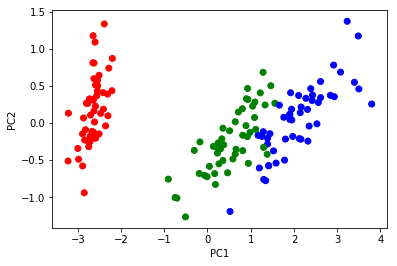

In [50]:
# Rotate and remove uneeded dimensions
D = np.zeros([X.shape[0], X.shape[1]])
np.fill_diagonal(D, S)
Xrotated = np.dot(U, D)
PCs = Xrotated[:,0:2]

plt.scatter(PCs[:,0],PCs[:,1],
            color=[['red','green','blue'][i] for i in Y.astype(int)])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<a name="single-layer-neural-networks"></a>
#### Single Layer Neural Networks
Creating the neural network requires four steps:
1. Declare which model you'd like to use. In this case _`keras.Sequential()`_
2. Add the output layer
3. Compile the network
4. Train the network (using _`fit()`_)

Example below:

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


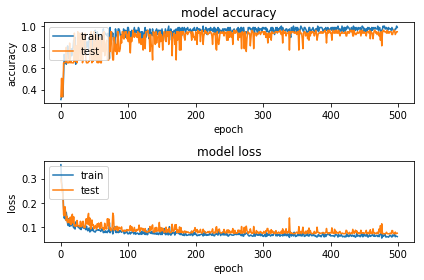

In [51]:
import pandas
import numpy as np
import keras

data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",
                                  delim_whitespace=True,
                                  header=None))
X = data[:,0:4]

labels = data[:,4]
Y = keras.utils.to_categorical(labels,
                               len(np.unique(labels)))

model = keras.Sequential()
# Input size - 4
input_size = X.shape[1]
# Output size - 3
output_size = Y.shape[1]

model.add(keras.layers.Dense(output_size,
                             activation='sigmoid',
                             input_shape=[input_size]))
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.7),
              metrics=['accuracy'])

batch_size = 16
epochs = 500
validation_split = 0.5

history = model.fit(X, Y,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 0,
          validation_split = validation_split)

# Plot Results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()  

In [52]:
score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

150/150 [==============================] - 0s 43us/step
Test loss: 0.06692401697238286
Test accuracy: 0.9533333309491475


---
<a name="week2"></a>
## Week 2

During this week, we began to dive _deeper_ into mulitlayer neural networks...

<a name="multilayer-networks"></a>
#### Multilayer Networks
##### Activation Function and Loss Function Pairings
There is often a pairing of what activation and loss functions one should be using for a given neural network. They can be broken down into two categories. Regression and classification, where regression involves a singular output of continuous values, and classification entails categorizing something using one or more discrete categories. The classification category can be further broken down into binary classification or multiclass classification. There is often an activation function and loss function that lend themselves particularly well to a specific one of these categories.

| Category | Activation Function | Loss Function |
| --- | --- | ---|
| **Regression**| Linear $g(net_i) = net_i$ | Mean Sum Error _(Usually)_|
| **Binary Classification** | Logistic Sigmoid | Binary Cross-Entropy |
| **Multiclass Classification** | Softmax | Categorical Cross-Entropy |



<a name="reinforcement"></a>
#### Reinforcement Learning
The networks we have worked on up until this point involved supervised learning. Upon each pass through the neural net, the network was not only shown whether it was right or wrong, but also what the answer should have been. _Reinforcement Learning_ works in a different manner. There is an __agent__ which is placed into an environment, trying to reach a goal. Only upon reaching this goal does it receive feedback whether it was right or wrong. Therefore, there is a _difference in time_ of when the agent receives feedback. The agent must then figure out which actions it made were correct. This is known as __TD Learning__. See the example program below:

The following program demonstrates _Temporal Difference Learning_. We begin with a 1D maze which contains a single goal. Each section of the maze can be thought of as a __state__. We set the reward for the goal to one, and the reward for all other states to zero. We then drop the __agent__ into a random state, and let it search for the goal. Each time the goal is found the __value__ of the states used to get there will update to show the most efficient path.

Epoch is set to the amount of times the agent will be dropped into a state to find the goal. Goal is set to which state in the maze represents the goal.

Try out adjusting the length of the 1D Maze:

In [1]:
import random
from fractions import Fraction

LENGTH = 8  # Try me out
GAMMA = .5
GOAL = 0
EPOCH = 30

class Maze:
    i = 0

    def __init__(self):
        self._reward = [0] * LENGTH   # Reward matrix
        self._value = [0] * LENGTH    # Value matrix
        self._reward[GOAL] = 1

    # Disply the maze with current values inside
    def display(self):
        print(" ------" * LENGTH)
        
        print("|", end='')
        for i in range(LENGTH):
            print(" %4s |" %Fraction(self._value[i]), end='')
        print()
        print(" ------" * LENGTH)
        for i in range(LENGTH):
            print("  ", i, "  ", end='')
        print()
        return

    # Drop agent into maze and search for goal
    def episode(self, s):
        # Search and update value until reaches goal
        while(s != GOAL):            
            self._value[s] += self.delta(s)
            # Move to next state
            s = self._nextS(s)
        self._value[s] += self.delta(s)

        return

    # delta(s) = (r(s) + gamma v(s + 1)) - v(s)
    def delta(self, s):
        if (s == GOAL):
            future_val = 0.0
        else:
            future_val = GAMMA * self.v(self._nextS(s))
        term = self._reward[s] + future_val
        return term - self._value[s]
    
    # V(s) = v(s) + gamma V(s+1)
    def v(self, s):
        if (s == GOAL):
            return self._value[GOAL]
        else:
            return self._reward[s] + (GAMMA * self._value[self._nextS(s)])

    # Obtain the next state to  be moved to
    def _nextS(self, s):
        # determine left and right values (accounting for wrap around)
        if (s == 0):
            left = (LENGTH-1)
            right = s + 1
        elif (s == (LENGTH-1)):
            left = s - 1
            right = 0
        else:
            left = s - 1
            right = s + 1

        # determine whether to go left or right
        if (self._value[left] >= self._value[right]):
            nextS = left
        else:
            nextS = right

        return nextS
    
    # Obtain the matrix of state values
    def get_values(self):
        return self._value

The goal is 0
 ------ ------ ------ ------ ------ ------ ------ ------
|    0 |    0 |    0 |    0 |    0 |    0 |    0 |    0 |
 ------ ------ ------ ------ ------ ------ ------ ------
   0      1      2      3      4      5      6      7   
Maze after completion:
 ------ ------ ------ ------ ------ ------ ------ ------
|    1 |  1/2 |  1/4 |  1/8 | 1/16 |  1/8 |  1/4 |  1/2 |
 ------ ------ ------ ------ ------ ------ ------ ------
   0      1      2      3      4      5      6      7   

Elapsed time: 0.0006234645843505859


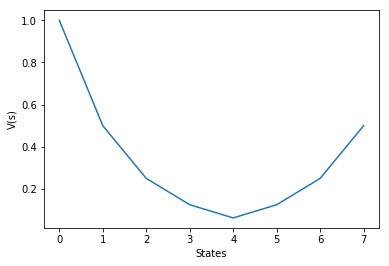

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

maze = Maze()
print("The goal is", GOAL)
maze.display()

start = time.time()
for i in range(EPOCH):
    s = random.randint(0, LENGTH-1)
    maze.episode(s)
end = time.time()

print("Maze after completion:")
maze.display()
print("\nElapsed time:", (end - start))

# Plot the results
v = maze.get_values()
states = np.linspace(0, LENGTH-1, LENGTH)
plt.plot(states, v)
plt.xlabel("States")
plt.ylabel("V(s)")
plt.show()

<a name='week3'></a>
# Week 3

##### Standardization of Data
An extra technique that may be helpful to training neural nets is standardization of data. This helps "level the playing field" so to speak to give each of the data points an equal chance of affecting the weights. The formula for standardization is like so: 
</br>$z = \frac{x - \mu}{\sigma}$ where $\mu$ is the mean and $\sigma$ is the standard diviation.